In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/charmander-tight.png

File ‘charmander-tight.png’ already there; not retrieving.



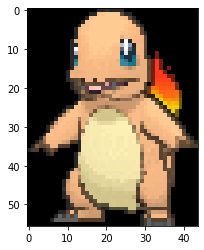

In [3]:
ch = image.load_img('charmander-tight.png')
plt.imshow(ch)
plt.show()

In [4]:
type(ch)

PIL.Image.Image

In [5]:
IMG_SIZE = 200
ch = np.array(ch)
CH_H, CH_W, _ = ch.shape

def image_generator(batch_size=5):
  while True:
      X = np.zeros((batch_size, IMG_SIZE, IMG_SIZE, 3))
      Y = np.zeros((batch_size, 4))

      for i in range(batch_size):
        # locate the region for Charmander
        row0 = np.random.randint(IMG_SIZE - CH_H)
        col0 = np.random.randint(IMG_SIZE - CH_W)
        row1 = row0 + CH_H
        col1 = col0 + CH_W

        # flip Charmander with probability
        if np.random.random() < 0.5:
          ch_new = np.fliplr(ch)
        else:
          ch_new = ch

        # place Charmander in
        X[i, row0:row1, col0:col1, :] = ch_new[:,:,:]
        Y[i, 0] = row0 / IMG_SIZE
        Y[i, 1] = col0 / IMG_SIZE
        Y[i, 2] = (row1 - row0) / IMG_SIZE
        Y[i, 3] = (col1 - col0) / IMG_SIZE

      yield X / 255.0, Y

In [6]:
ch.shape

(56, 44, 3)

In [7]:
def make_model():
  vgg = tf.keras.applications.VGG16(
      input_shape=[IMG_SIZE, IMG_SIZE, 3], 
      include_top=False, 
      weights='imagenet')
  x = Flatten()(vgg.output)
  x = Dense(4, activation='sigmoid')(x)
  model = Model(vgg.input, x)

  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001))

  return model

In [8]:
model = make_model()
model.fit(
    image_generator(),
    steps_per_epoch=50,
    epochs=5
)

Epoch 1/5
50/50 [==============================] - 10s 196ms/step - loss: 0.6389
Epoch 2/5
50/50 [==============================] - 10s 199ms/step - loss: 0.5743
Epoch 3/5
50/50 [==============================] - 10s 199ms/step - loss: 0.5665
Epoch 4/5
50/50 [==============================] - 10s 200ms/step - loss: 0.5588
Epoch 5/5
50/50 [==============================] - 10s 199ms/step - loss: 0.5507


In [10]:
def pokemon_prediction():
  x = np.zeros((IMG_SIZE, IMG_SIZE, 3))
  row0 = np.random.randint(IMG_SIZE - CH_H)
  col0 = np.random.randint(IMG_SIZE - CH_W)
  row1 = row0 + CH_H
  col1 = col0 + CH_W

  # flip Charmander with probability     
  if np.random.random() < 0.5:
    ch_new = np.fliplr(ch)
  else:
    ch_new = ch

  x[row0:row1, col0:col1, :] = ch_new[:,:,:]
  print([row0, col0, row1, col1])

  # Predict
  X = np.expand_dims(x, 0) / 255.0
  p = model.predict(X)[0]
  print((p*IMG_SIZE).astype(int).tolist())
  
  # Draw the box
  fig, ax = plt.subplots(1)
  ax.imshow(x.astype(np.uint8))
  rect = Rectangle(
      (p[1]*IMG_SIZE, p[0]*IMG_SIZE),
      p[3]*IMG_SIZE, 
      p[2]*IMG_SIZE, 
      linewidth=1, 
      edgecolor='r', 
      facecolor='none')
  ax.add_patch(rect)
  plt.show()

[27, 40, 83, 84]
[23, 39, 60, 46]


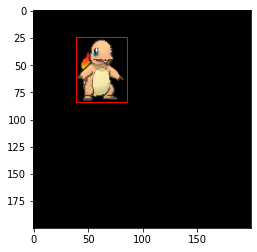

In [22]:
pokemon_prediction()